# Colorectal histology dataset with LeNet 5

# Preview: Neural Network examples with `tf.keras`

- `tf.keras` Software (http://keras.io/);

- Visual example of LeNet-5 (http://yann.lecun.com/exdb/lenet/) using MNIST digits dataset;

- Examples with common neural network topologies (https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/).

## Colorectal histology

Methods to diagnose colorectal using histology images (<https://zenodo.org/record/53169#.XGZemKwzbmG>, <https://www.tensorflow.org/datasets/catalog/colorectal_histology>)

In this case, the purpose is to classify the type of histology in a given image in the following categories:

- 0: TUMOR
- 1: STROMA
- 2: COMPLEX
- 3: LYMPHO
- 4: DEBRIS
- 5: MUCOSA
- 6: ADIPOSE
- 7: EMPTY

## Local instalation (option 1)

Install the following Python packages to run this notebook

`pip install pip -U`

`pip install tensorflow jupyter`

## Google Colab (option 2)

[Google Colab](https://colab.research.google.com/) is a research project created to help disseminate machine learning education and research. It's a `Jupyter notebook` environment that requires no setup to use and runs entirely in the cloud.

Colaboratory notebooks are stored in [Google Drive](https://drive.google.com) and can be shared just as you would with Google Docs or Sheets. Colaboratory is free to use.

For more information, see our [FAQ](https://research.google.com/colaboratory/faq.html).

### How install extra packages
Google Colab installs a series of basic packages if we need any additional package just install it.

In [ ]:
!pip install -q keras sklearn

## Import packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

## Define global constants

Lets start with a few epochs to test learning network parameters

In [3]:
batch_size = 34 #Number of training examples
nb_classes = 2  #or 8
epochs = 5 #Number of iterations // Passes the entire training has completed

# Scaling input image to theses dimensions
img_rows, img_cols = 32, 32

## Load image database

In [4]:
def format_example(image):
    image = tf.cast(image, tf.float32)
    # Normalize the pixel values
    image = image / 255.0
    # Resize the image
    image = tf.image.resize(image, (img_rows, img_cols))
    return image


def load_data(name="colorectal_histology"):
  train_ds = tfds.load(name, split=tfds.Split.TRAIN, batch_size=-1)
  train_ds['image'] = tf.map_fn(format_example, train_ds['image'], dtype=tf.float32)
  numpy_ds = tfds.as_numpy(train_ds)
  X, y = numpy_ds['image'], numpy_ds['label']

  return np.array(X), np.array(y)

## Plot images

In [5]:
def plot_symbols(X,y,n=15):
    index = np.random.randint(len(y), size=n)
    plt.figure(figsize=(25, 2))
    for i in np.arange(n):
        ax = plt.subplot(1,n,i+1)
        plt.imshow(X[index[i],:,:,:])
        plt.gray()
        ax.set_title(f'{y[index[i]]}-{index[i]}')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

## Build LeNet5 structure

<center><img src="https://www.dlsi.ua.es/~juanra/UA/curso_verano_DL/images/LeNet5.jpg"></center>

In [6]:
#
# Build an ANN structure - LeNet5
#

def cnn_model():
    #
    # Neural Network Structure
    #
    
    model = Sequential()
    
    
    model.add(layers.Conv2D(6, (5, 5))) #Output dimensionality, kernel_size (Height, width)
    model.add(layers.Activation("tanh")) #Applies an activation function to an output
    model.add(layers.MaxPooling2D(pool_size=(2, 2))) #Getting a size 2x2 for the window
    
    model.add(layers.Conv2D(16, (5, 5)))
    model.add(layers.Activation("tanh"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        
    model.add(layers.Flatten())
    
    model.add(layers.Dense(120)) #dense(Dimensionality of the output space)
    model.add(layers.Activation("tanh"))
    
    model.add(layers.Dense(84))
    model.add(layers.Activation("sigmoid"))
    
    model.add(layers.Dense(nb_classes))
    model.add(layers.Activation('softmax'))

    return model

## Start to run the program

### Load data

In [7]:
##################################################################################
# Main program

X, y = load_data()
print("Los resultados que hemos obtenido, son los siguientes")

print(X.shape, 'train samples')
print(img_rows,'x', img_cols, 'image size')
print(epochs,'epochs')

Shuffling and writing examples to /root/tensorflow_datasets/colorectal_histology/2.0.0.incomplete2ZNX0R/colorectal_histology-train.tfrecord


Dataset colorectal_histology downloaded and prepared to /root/tensorflow_datasets/colorectal_histology/2.0.0. Subsequent calls will reuse this data.
Los resultados que hemos obtenido, son los siguientes
(5000, 32, 32, 3) train samples
32 x 32 image size
5 epochs


Only for binary classification. All number of classes greater than 0 will be set to 1.

In [9]:
if nb_classes==2:
  y[y>0] = 1

### Let to see examples of the dataset

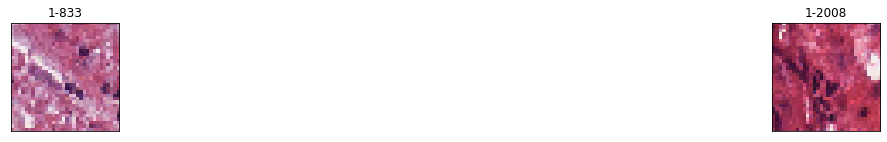

In [10]:
plot_symbols(X, y, 2)

## Number of examples per class

In [11]:
collections.Counter(y)

Counter({0: 625, 1: 4375})

## Split examples in training/test sets

This section is introductory to serve as a simple example. To test the model created in different situations, a 10 cross validation (10-CV) strategy should be used. 

In [12]:
model = cnn_model()
  
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [13]:
datagen = ImageDataGenerator(
  featurewise_center=True,
  featurewise_std_normalization=True,
  rotation_range=20,
  width_shift_range=0.3,
  height_shift_range=0.3,
  horizontal_flip=True,
  validation_split=0.1)

In [14]:
def get_score(X_train, X_test, y_train_nn, y_test_nn):
  datagen.fit(X_train)
  
 # model = cnn_model()
  
  model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

  #Forma manual de entrenar al modelo (Me devuelve mejores resultados)
  for e in range(epochs):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(X_train, y_train_nn, batch_size=batch_size):
        early_stopping = EarlyStopping(monitor='val_loss', patience = 10)
        model.fit(X_train, y_train_nn , batch_size=batch_size ,validation_split = 0.1, verbose=2, callbacks=[early_stopping] )
        batches += 1
        print(batches)
        print(len(X_train) / batch_size )
        if batches >=  batch_size:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break
  
  
  #model.fit(datagen.flow(X_train, y_train_nn, batch_size=batch_size), steps_per_epoch=len(X_train) / batch_size, epochs=epochs) #, callbacks=[early_stopping])
  loss, acc = model.evaluate(X_test, y_test_nn, batch_size=batch_size)
  return loss, acc, model

In [15]:
def balance_X_train(X_train, y_train): 
  X_train_0 = X_train[y_train[y_train == 0]]

  y_train_0 = y_train[y_train == 0]
  #print(y_train_0)
  #size_to_add =X_train.shape[0]- 2*X_train_0.shape[0]
  print("The old size was " ,X_train_0.shape[0] )
  #Setting the x_train and the y_train to the balancing size
  #if size_to_add > 0:     
  for i in range(6):
    
    X_train = np.concatenate((  X_train , X_train_0) , axis = 0) 
    
    y_train = np.concatenate(( y_train ,   y_train_0), axis= 0 )
    
  print("The new size is " , X_train[y_train[y_train== 0]].shape[0])
  return X_train,y_train

In [26]:
def cross_validation( k=10):
  auc_per_fold = []
  acc_per_fold = []
  acc_percent_per_fold = []
  loss_per_fold = []
  X_train_output = []
  X_test_output= []
  y_test_nn_output=[]
  y_train_nn_output=[]  
  y_test_output = []
  y_train_output= []
  acc = 0
  loss= 200
  kf = StratifiedKFold(n_splits=k )
  for train_index, test_index in kf.split(X,y): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Before " ,  X_train[y_train[y_train == 0]].shape[0])
    #Balancing the dataset if it's necessary (Solo cuando es 0 y 1 )
    if nb_classes ==2:
      X_train, y_train= balance_X_train(X_train , y_train);
    print("After " ,  X_train[y_train[y_train == 0]].shape[0])
    # Convert integers to one-hot vector
    y_train_nn = keras.utils.to_categorical(y_train, nb_classes)
    y_test_nn = keras.utils.to_categorical(y_test, nb_classes)
    print(f'X_train {X_train.shape} X_test {X_test.shape}')
    print(f'y_train {y_train.shape} y_test {y_test.shape}')
    print(f'y_train_nn {y_train_nn.shape} y_test_nn {y_test_nn.shape}')
    actual_loss, actual_acc, model= get_score(X_train, X_test, y_train_nn, y_test_nn)
    print(f'loss: {actual_loss:.2f} acc: {actual_acc:.2f}')
    acc_per_fold.append(actual_acc)
    loss_per_fold.append(actual_loss)
    acc_percent_per_fold.append(actual_acc*100) #For getting the wilcoxon 
    y_scores = model.predict(X_test) # Confidence prediction per class
    y_pred = y_scores.argmax(axis=1) # Select classes with most confidence prediction
    print('Predictions', collections.Counter(y_pred),'\n')

    print('Confusion matrix')
    print(metrics.confusion_matrix(y_test,y_pred),'\n')

    target_names = ['TUMOR', 'HEALTHY'] if nb_classes ==  2 else ['TUMOR','STROMA','COMPLEX','LYMPHO','DEBRIS','MUCOSA','ADIPOSE','EMPTY']

    print(metrics.classification_report(y_test, y_pred, target_names=target_names))
    if nb_classes ==  2:
      auc_per_fold.append(f'AUC {metrics.roc_auc_score(y_test, np.round(y_scores[:,1],2)):.4f} ')
      print(f'AUC {metrics.roc_auc_score(y_test, np.round(y_scores[:,1],2)):.4f} ')
    else:
      auc_per_fold.append(f'AUC {metrics.roc_auc_score(y_test, y_scores, multi_class = "ovr"):.4f} ')
      print(f'AUC {metrics.roc_auc_score(y_test, y_scores, multi_class = "ovr"):.4f} ')
 
  return acc_per_fold, loss_per_fold, auc_per_fold, y_pred, acc_percent_per_fold, model
  #return X_train_output, X_test_output, y_test_nn_output, y_train_nn_output, y_test_output, y_train_output; 


In [27]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

acc_per_fold, loss_per_fold, auc_per_fold, y_pred, acc_percent_per_fold, model = cross_validation(10)
print(acc_per_fold)
print(loss_per_fold)
print("AUC PER FOLD " , auc_per_fold)
print(model.summary())
#loss, acc = get_score(X_train, X_test, y_train_nn, y_test_nn)


Before  563
The old size was  563
The new size is  3941
After  3941
X_train (7878, 32, 32, 3) X_test (500, 32, 32, 3)
y_train (7878,) y_test (500,)
y_train_nn (7878, 2) y_test_nn (500, 2)
Epoch 0
209/209 - 1s - loss: 0.0051 - accuracy: 0.9984 - val_loss: 2.3493e-04 - val_accuracy: 1.0000
1
231.7058823529412
209/209 - 1s - loss: 0.0014 - accuracy: 0.9999 - val_loss: 2.5972e-04 - val_accuracy: 1.0000
2
231.7058823529412
209/209 - 1s - loss: 0.0013 - accuracy: 0.9999 - val_loss: 2.7653e-04 - val_accuracy: 1.0000
3
231.7058823529412
209/209 - 1s - loss: 0.0013 - accuracy: 0.9999 - val_loss: 3.4267e-04 - val_accuracy: 1.0000
4
231.7058823529412
209/209 - 1s - loss: 0.0013 - accuracy: 0.9999 - val_loss: 4.0654e-04 - val_accuracy: 1.0000
5
231.7058823529412
209/209 - 1s - loss: 0.0013 - accuracy: 0.9999 - val_loss: 4.0225e-04 - val_accuracy: 1.0000
6
231.7058823529412
209/209 - 1s - loss: 0.0013 - accuracy: 0.9999 - val_loss: 3.1371e-04 - val_accuracy: 1.0000
7
231.7058823529412
209/209 - 1s 

15/15 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9960
loss: 0.01 acc: 1.00
Predictions Counter({1: 440, 0: 60}) 

Confusion matrix
[[ 60   2]
 [  0 438]] 

              precision    recall  f1-score   support

       TUMOR       1.00      0.97      0.98        62
     HEALTHY       1.00      1.00      1.00       438

    accuracy                           1.00       500
   macro avg       1.00      0.98      0.99       500
weighted avg       1.00      1.00      1.00       500

AUC 1.0000 
Before  562
The old size was  562
The new size is  3934
After  3934
X_train (7872, 32, 32, 3) X_test (500, 32, 32, 3)
y_train (7872,) y_test (500,)
y_train_nn (7872, 2) y_test_nn (500, 2)
Epoch 0
209/209 - 1s - loss: 0.0090 - accuracy: 0.9979 - val_loss: 1.4542e-04 - val_accuracy: 1.0000
1
231.52941176470588
209/209 - 1s - loss: 0.0017 - accuracy: 0.9999 - val_loss: 1.9167e-04 - val_accuracy: 1.0000
2
231.52941176470588
209/209 - 1s - loss: 0.0014 - accuracy: 0.9999 -

15/15 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9940
loss: 0.01 acc: 0.99
Predictions Counter({1: 436, 0: 64}) 

Confusion matrix
[[ 62   1]
 [  2 435]] 

              precision    recall  f1-score   support

       TUMOR       0.97      0.98      0.98        63
     HEALTHY       1.00      1.00      1.00       437

    accuracy                           0.99       500
   macro avg       0.98      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500

AUC 0.9998 
Before  562
The old size was  562
The new size is  3934
After  3934
X_train (7872, 32, 32, 3) X_test (500, 32, 32, 3)
y_train (7872,) y_test (500,)
y_train_nn (7872, 2) y_test_nn (500, 2)
Epoch 0
209/209 - 1s - loss: 0.0067 - accuracy: 0.9980 - val_loss: 2.4292e-04 - val_accuracy: 1.0000
1
231.52941176470588
209/209 - 1s - loss: 0.0019 - accuracy: 0.9997 - val_loss: 2.7724e-04 - val_accuracy: 1.0000
2
231.52941176470588
209/209 - 1s - loss: 0.0014 - accuracy: 0.9999 -

In [33]:
def set_wilcoxon():
  plt.plot(range(len( acc_percent_per_fold)) , acc_percent_per_fold , 'ro-',label='acc_x')
  plt.ylabel('Aciertos')
  plt.xlabel('Prueba')
  plt.legend()

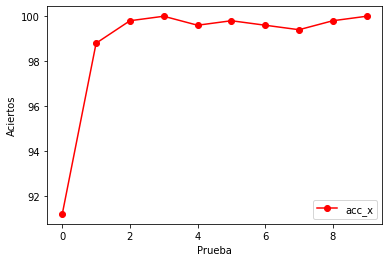

In [34]:
set_wilcoxon()

### Model and optimizers

Test [optimizer](https://keras.io/optimizers/) parameter with `sgd`, `adadelta` or `adam` values in order to check the final precision achieved.

In [ ]:
print(f'loss: {loss:.2f} acc: {acc:.2f}')

NameError: ignored

In [ ]:
print(model.summary())

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_150 (Conv2D)          (None, 28, 28, 6)         456       
_________________________________________________________________
activation_375 (Activation)  (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_150 (MaxPoolin (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_376 (Activation)  (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_151 (MaxPoolin (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_75 (Flatten)         (None, 400)             

## Prediction

### Testing AUC result for two and multiple classes

In [ ]:
y_scores = model.predict(X_test) # Confidence prediction per class
y_pred = y_scores.argmax(axis=1) # Select classes with most confidence prediction

if nb_classes ==  2:
  print(f'AUC {metrics.roc_auc_score(y_test, np.round(y_scores[:,1],2)):.4f} ')
else:
  print(f'AUC {metrics.roc_auc_score(y_test, y_scores, multi_class = "ovr"):.4f} ')

NameError: ignored

## More metrics about results

We can find more information about `precision`, `recall` and `f1` metrics in <https://en.wikipedia.org/wiki/Precision_and_recall>.

In [ ]:
print('Predictions', collections.Counter(y_pred),'\n')

print('Confusion matrix')
print(metrics.confusion_matrix(y_test,y_pred),'\n')

target_names = ['TUMOR', 'HEALTHY'] if nb_classes ==  2 else ['TUMOR','STROMA','COMPLEX','LYMPHO','DEBRIS','MUCOSA','ADIPOSE','EMPTY']

print(metrics.classification_report(y_test, y_pred, target_names=target_names))

NameError: ignored